In [1]:
from pymatgen.electronic_structure.boltztrap2 import *

In [2]:
data = VasprunLoader().from_file('vasprun-PbTe_uniform_bs.xml')

/home/riccif/software/github/my_pymatgen/pymatgen/pymatgen/io/vasp/outputs.py:822: UserWarning: No POTCAR file with matching TITEL fields was found in /home/riccif/software/github/my_pymatgen/pymatgen/examples
  " was found in {}".format(os.path.abspath(p)))


# Interpolator

In [3]:
bztInterp = BztInterpolator(data)

In [4]:
sbs = bztInterp.get_band_structure()

In [5]:
tot_dos = bztInterp.get_dos(T=200)

In [6]:
tot_proj_dos = bztInterp.get_dos(partial_dos=True,T=200)

100%	|##########| 18/18

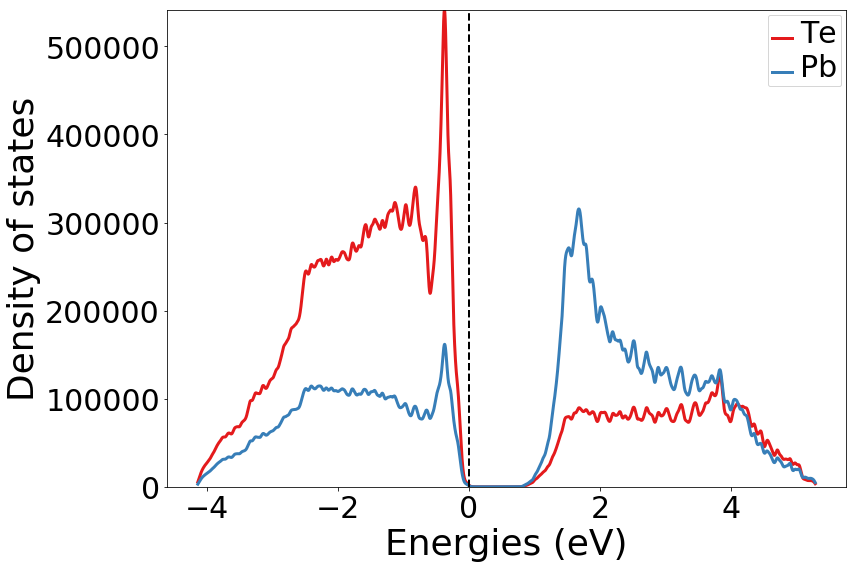

In [7]:
from pymatgen.electronic_structure.plotter import DosPlotter
pltdos = DosPlotter()
pltdos.add_dos_dict(tot_proj_dos.get_element_dos())
pltdos.show()

# Transport Properties

In [8]:
bztTransp = BztTransportProperties(bztInterp,temp_r = np.arange(100,1300,100))

In [9]:
print('Temp, energies, rows, columns tensor')
for p in bztTransp.Conductivity_mu, bztTransp.Seebeck_mu, bztTransp.Kappa_mu, \
         bztTransp.cond_Effective_mass_mu, bztTransp.Power_Factor_mu:
    print(p.shape)

Temp, energies, rows, columns tensor
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)


In [10]:
bztTransp.compute_properties_doping(doping=10.**np.arange(16,23))

In [11]:
print('Temp, Doping, rows, columns tensor')
for p in bztTransp.Conductivity_doping, bztTransp.Seebeck_doping, bztTransp.Kappa_doping, \
         bztTransp.cond_Effective_mass_doping, bztTransp.Power_Factor_doping:
    print(p['n'].shape)

Temp, Doping, rows, columns tensor
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)


# Plotter

In [12]:
bztPlotter = BztPlotter(bztTransp,bztInterp)

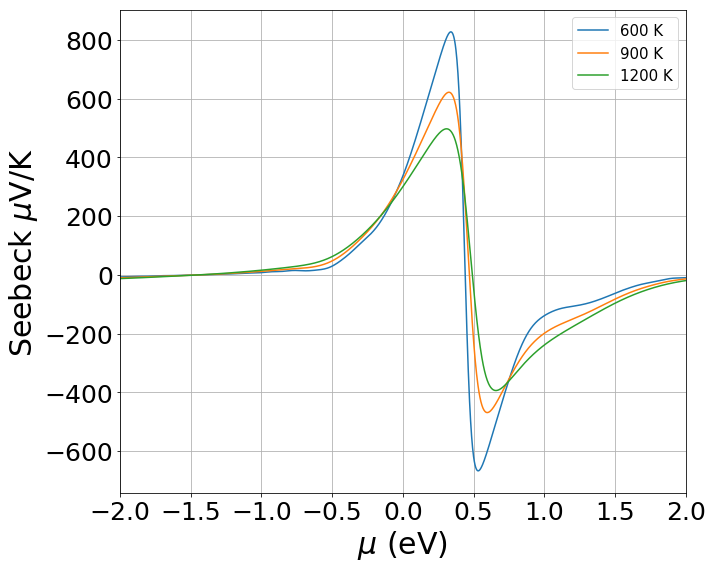

In [13]:
bztPlotter.plot_props('S','mu','temp',temps=[600,900,1200]).show()

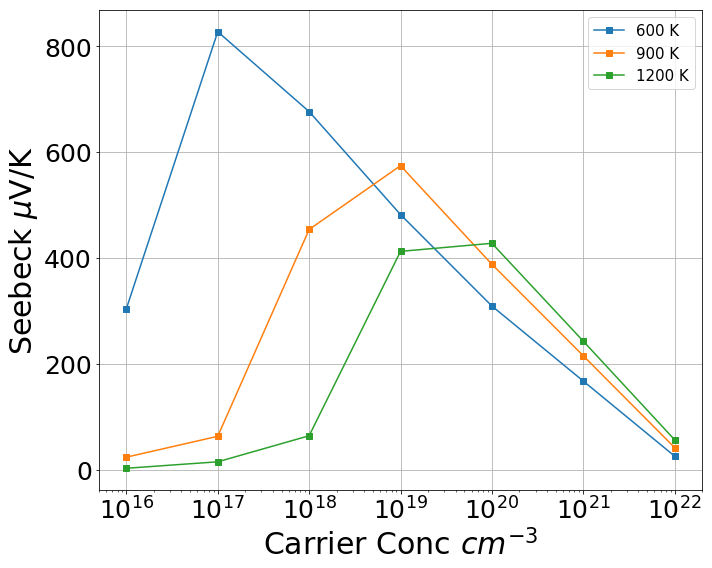

In [14]:
bztPlotter.plot_props('S','doping','temp', temps=[600,900,1200], dop_type='p').show()

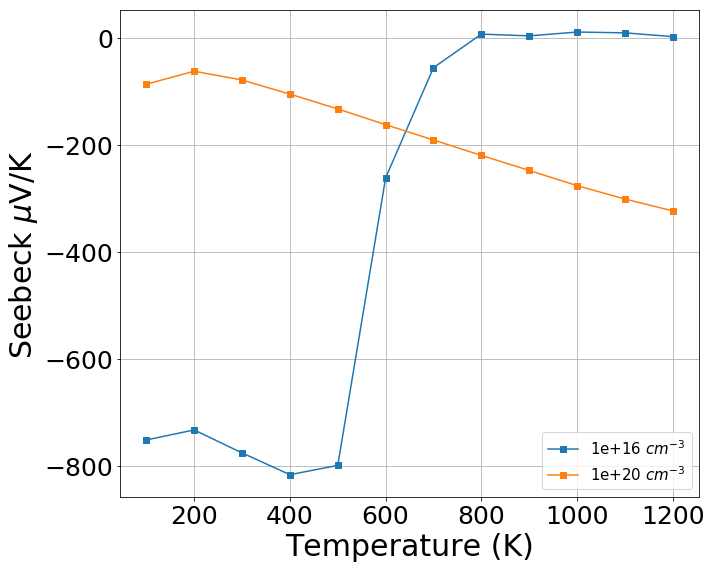

In [15]:
bztPlotter.plot_props('S','temp','doping',doping=[1e16,1e20], dop_type='n').show()

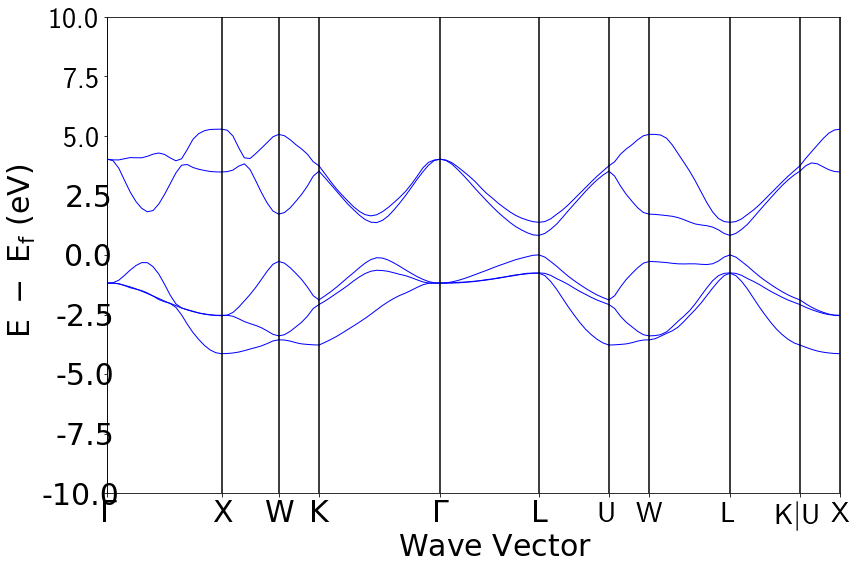

In [16]:
bztPlotter.plot_bands().show()

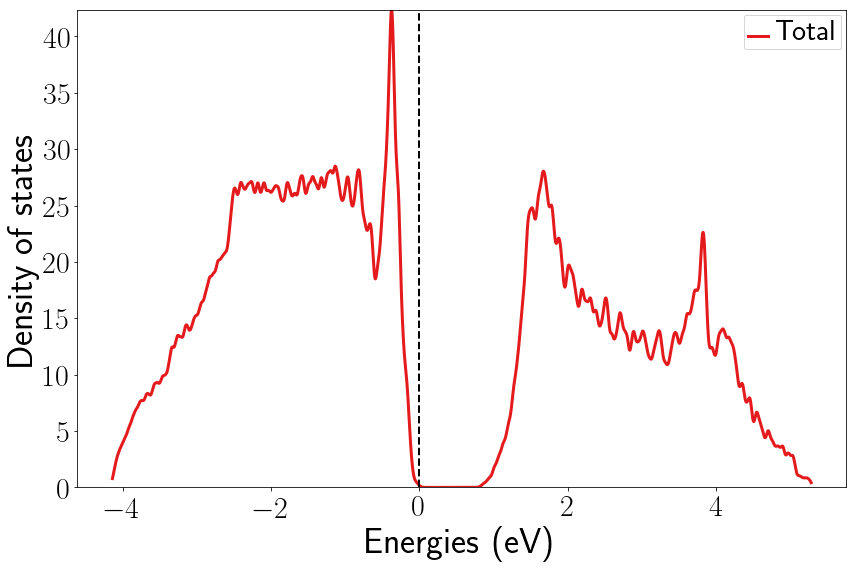

In [17]:
bztPlotter.plot_dos(T=200).show()